In [1]:
from diffusers import DiffusionPipeline
import torch

model_id = "/home/siyuan/research/image_to_img_generation/dreambooth/output"
pipe = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
prompt = "A human chest x-ray"

/home/siyuan/mambaforge/envs/huggingface/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]

100%|██████████| 50/50 [00:05<00:00,  9.15it/s]


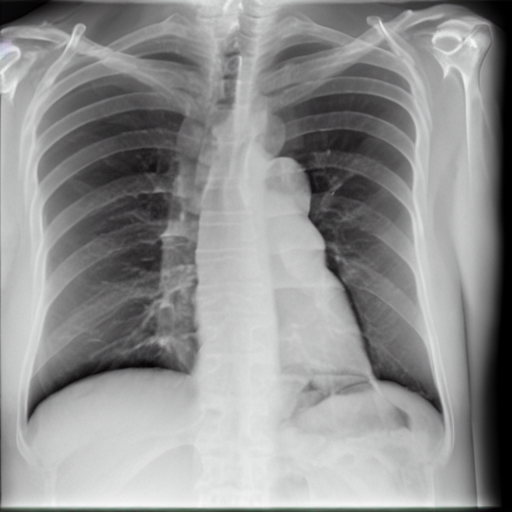

In [3]:
image